The [Containers](Containers.ipynb) Tutorial introduced the [HoloMap](Containers.ipynb#HoloMap), a core HoloViews data structure that allows easy exploration of parameter spaces. The essence of a HoloMap is that it contains a collection of [Elements](Elements.ipynb) (e.g. Images and Curves) that you can easily select and visualize.

HoloMaps hold fully constructed Elements at specifically sampled points in a multidimensional space. Although HoloMaps are useful for exploring high-dimensional parameter spaces, they can very quickly consume huge amounts of memory to store all these Elements. For instance, a hundred samples along four orthogonal dimensions would need a HoloMap containing a hundred *million* Elements, each of which could be a substantial object that takes time to create and costs memory to store. Thus ``HoloMaps`` have some clear limitations:

* HoloMaps may require the generation of millions of Elements before the first element can be viewed.
* HoloMaps can easily exhaust all the memory available to Python.
* HoloMaps can even more easily exhaust all the memory in the browser when displayed.
* Static export of a notebook containing HoloMaps can result in impractically large HTML files.

The ``DynamicMap`` addresses these issues by computing and displaying elements dynamically, allowing exploration of much larger datasets:

* DynamicMaps generate elements on the fly, allowing the process of exploration to begin immediately.
* DynamicMaps do not require fixed sampling, allowing exploration of parameters with arbitrary resolution.
* DynamicMaps are lazy in the sense they only compute only as much data as the user wishes to explore.

Of course, these advantages come with some limitations:

* DynamicMaps require a live notebook server and cannot be fully exported to static HTML.
* DynamicMaps store only a portion of the underlying data, in the form of an Element cache and their output is dependent on the particular version of the executed code.   
* DynamicMaps (and particularly their element caches) are typically stateful (with values that depend on patterns of user interaction), which can make them more difficult to reason about.

In addition to the different computational requirements of ``DynamicMaps``, they can be used to build sophisticated, interactive vizualisations that cannot be achieved using only ``HoloMaps``. This notebook demonstrates some basic examples and the [Streams](Streams.ipynb) notebook follows on by introducing the streams system. The [Linked Streams](Linked_Streams.ipynb) tutorial shows how you can directly interact with your plots when using the Bokeh backend.

When DynamicMap was introduced in version 1.6, it support multiple different 'modes' which have now been deprecated. This notebook demonstrates the simpler, more flexible and more powerful DynamicMap introduced in version 1.7. Users who have been using the previous version of DynamicMap should be unaffected as backwards compatibility has been preserved for the most common cases.

All this will make much more sense once we've tried out some ``DynamicMaps`` and showed how they work, so let's create one!

<center><div class="alert alert-info" role="alert">To visualize and use a <b>DynamicMap</b> you need to be running a live Jupyter server.<br>This tutorial assumes that it will be run in a live notebook environment.<br>
When viewed statically, DynamicMaps will only show the first available Element,<br> and will thus not have any slider widgets, making it difficult to follow the descriptions below.<br><br>
It's also best to run this notebook one cell at a time, not via "Run All",<br> so that subsequent cells can reflect your dynamic interaction with widgets in previous cells.</div></center>

## ``DynamicMap``  <a id='DynamicMap'></a>

Let's start by importing HoloViews and loading the extension:

In [0]:
!pip install holoviews

     |████████████████████████████████| 4.0MB 2.8MB/s 
     |████████████████████████████████| 71kB 24.0MB/s 


In [0]:
import holoviews as hv
import numpy as np
hv.notebook_extension()

/usr/local/lib/python3.6/dist-packages/param/parameterized.py:2811: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  return inst.__call__(*args,**params)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

We will now create  ``DynamicMap`` similar to the  ``HoloMap`` introduced in the [Containers Tutorial](Containers.ipynb#HoloMap). The ``HoloMap`` in that tutorial consisted of ``Image`` elements defined by a function returning NumPy arrays called ``sine_array``. Here we will define a ``waves_image`` function that returns an array pattern parameterized by arbitrary ``alpha`` and ``beta`` parameters inside a HoloViews [Image](Elements.ipynb#Image) element:

In [1]:
xvals = np.linspace(-4,0,202)
yvals = np.linspace(4,0,202)
xs,ys = np.meshgrid(xvals, yvals)

def waves_image(alpha, beta):
    return hv.Image(np.sin(((ys/alpha)**alpha+beta)*xs))

waves_image(0,0) + waves_image(0,4)

NameError: ignored

Now we can demonstrate the possibilities for exploration enabled by the simplest declaration of a ``DynamicMap``.

### Basic ``DynamicMap`` declaration<a id='BasicDeclaration'></a>

A simple ``DynamicMap`` declaration looks identical to that needed to declare a ``HoloMap``. Instead supplying some initial data, we will supply the ``waves_image`` function instead with key dimensions simply declaring the arguments of that function:

In [0]:
dmap = hv.DynamicMap(waves_image, kdims=['alpha', 'beta'])
dmap

DynamicMap cannot be displayed without explicit indexing as 'alpha', 'beta' dimension(s) are unbounded. 
Set dimensions bounds with the DynamicMap redim.range or redim.values methods.

:DynamicMap   [alpha,beta]

This object is created instantly, but because it doesn't generate any `hv.Image` objects initially it only shows the printed representation of this object along with some information about how to display it. We will refer to a ``DynamicMap`` that doesn't have enough information to display itself as 'unbounded'.

The textual representation of all ``DynamicMaps`` look similar, differing only in the listed dimensions until they have been evaluated at least once.

#### Explicit indexing

Unlike a corresponding ``HoloMap`` declaration, this simple unbounded ``DynamicMap`` cannot yet visualize itself. To view it, we can follow the advice in the warning message. First we will explicitly index into our ``DynamicMap`` in the same way you would access a key on a ``HoloMap``:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)
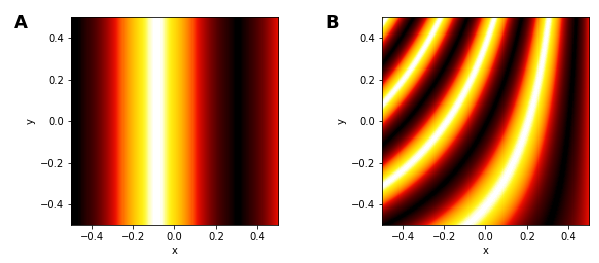

In [0]:
dmap[0,1] + dmap.select(alpha=1, beta=2)

Note that the declared kdims are specifying the arguments *by position* as they do not match the argument names of the ``waves_image`` function. If you *do* match the argument names *exactly*, you can map a kdim position to any argument position of the callable. For instance, the declaration ``kdims=['freq', 'phase']`` would index first by frequency, then phase without mixing up the arguments to ``waves_image`` when indexing.

#### Setting dimension ranges

The second suggestion proposed by the warning was to supply dimension ranges using the ``redim.range`` method:

In [0]:
!pip install bokeh
import os
import bokeh

os.environ['HV_DOC_HTML'] = 'true'
hv.extension('bokeh')
import holoviews.plotting.bokeh

dmap.redim.range(alpha=(0,5.0), beta=(1,5.0))

ImportError: ignored

Here each `hv.Image` object visualizing a particular sine ring pattern with the given parameters is created dynamically, whenever the slider is set to that value.  Any value in the allowable range can be requested by dragging the sliders or by tweaking the values using the left and right arrow keys.

Of course, we didn't have to use the ``redim.range`` method and we could have simply declared the ranges right away using explicit ``hv.Dimension`` objects. This would allow us to declare other dimension properties such as the step size used by the sliders: by default each slider can select around a thousand distinct values along its range but you can specify your own step value via the dimension ``step`` parameter. If you use integers in your range declarations, integer stepping will be assumed with a step size of one.

It is important to note that whenever the ``redim`` method is used, a new ``DynamicMap`` is returned with the updated dimensions. In other words, the original ``dmap`` remains unbounded with default dimension objects.


#### Setting dimension values

This ``DynamicMap`` above allows exploration of *any* phase and frequency within the declared range unlike an equivalent ``HoloMap`` which would have to be composed of a finite set of samples. We can achieve a similar discrete sampling using ``DynamicMap`` by setting the ``values`` parameter on the dimensions:

In [0]:
dmap.redim.values(alpha=[0,1,2], beta=[0.1, 1.0, 2.5])

ImportError: ignored

The sliders now snap to the specified dimension values and if you are running this tutorial in a live notebook, the above cell should look like the ``HoloMap`` in the [Containers Tutorial](Containers.ipynb#HoloMap). ``DynamicMap`` is in fact a subclass of ``HoloMap`` with some crucial differences:

* You can now pick as many values of **alpha** or **beta** as allowed by the slider.
* What you see in the cell above will not be exported in any HTML snapshot of the notebook


We will now explore how ``DynamicMaps`` relate to ``HoloMaps`` including conversion operations between the two types. As we will see, there are other ways to display a ``DynamicMap`` without using explicit indexing or redim.

## Interaction with ``HoloMap``s

To explore the relationship between ``DynamicMap`` and ``HoloMap``, let's declare another callable to draw some shapes we will use in a new ``DynamicMap``:

In [0]:
def shapes(N, radius=0.5): # Positional keyword arguments are fine
    paths = [hv.Path([[(radius*np.sin(a), radius*np.cos(a)) 
                        for a in np.linspace(-np.pi, np.pi, n+2)]], 
                     extents=(-1,-1,1,1)) 
             for n in range(N,N+3)]
    return hv.Overlay(paths)

#### Sampling  ``DynamicMap`` from a ``HoloMap``

When combining a ``HoloMap`` with a ``DynamicMap``, it would be very awkward to have to match the declared dimension ``values`` of the DynamicMap with the keys of the ``HoloMap``. Fortunately you don't have to:

In [0]:
%%opts Path (linewidth=1.5)
holomap = hv.HoloMap({(N,r):shapes(N, r) for N in [3,4,5] for r in [0.5,0.75]},  kdims=['N', 'radius'])
dmap = hv.DynamicMap(shapes, kdims=['N','radius'])
holomap + dmap

Here we declared a ``DynamicMap`` without using ``redim``, but we can view its output because it is presented alongside a ``HoloMap`` which defines the available keys. This convenience is subject to three particular restrictions:


* You cannot display a layout consisting of unbounded ``DynamicMaps`` only, because at least one HoloMap is needed to define the samples.
* The HoloMaps provide the necessary information required to sample the DynamicMap. 

Note that there is one way ``DynamicMap`` is less restricted than ``HoloMap``: you can freely combine bounded ``DynamicMaps`` together in a ``Layout``, even if they don't share key dimensions.

Also notice that the ``%%opts`` cell magic allows you to style DynamicMaps can be styled in exactly the same way as HoloMaps. We will now use the ``%opts`` line magic to set the linewidths of all ``Path`` elements in the rest of the notebook:

In [0]:
%opts Path (linewidth=1.5)

#### Converting from ``DynamicMap`` to ``HoloMap``

Above we mentioned that ``DynamicMap`` is an instance of ``HoloMap``. Does this mean it has a ``.data`` attribute?

In [0]:
dtype = type(dmap.data).__name__
length = len(dmap.data)
print("DynamicMap 'dmap' has an {dtype} .data attribute of length {length}".format(dtype=dtype, length=length))

This is exactly the same sort of ``.data`` as the equivalent ``HoloMap``, except that its values will vary according to how much you explored the parameter space of ``dmap`` using the sliders above. In a ``HoloMap``, ``.data`` contains a defined sampling along the different dimensions, whereas in a ``DynamicMap``, the ``.data`` is simply the *cache*.

The cache serves two purposes:

* Avoids recomputation of an element should we revisit a particular point in the parameter space. This works well for categorical or integer dimensions, but doesn't help much when using continuous sliders for real-valued dimensions.
* Records the space that has been explored with the ``DynamicMap`` for any later conversion to a ``HoloMap`` up to the allowed cache size.

We can always convert *any* ``DynamicMap`` directly to a ``HoloMap`` as follows:

In [0]:
hv.HoloMap(dmap)

This is in fact equivalent to declaring a HoloMap with the same parameters (dimensions, etc.) using ``dmap.data`` as input, but is more convenient. Note that the slider positions reflect those we sampled from the ``HoloMap`` in the previous section.

Although creating a HoloMap this way is easy, the result is poorly controlled, as the keys in the DynamicMap cache are usually defined by how you moved the sliders around. If you instead want to specify a specific set of samples, you can easily do so by using the same key-selection semantics as for a ``HoloMap`` to define exactly which elements are to be sampled and put into the cache:

In [0]:
hv.HoloMap(dmap[{(2,0.3), (2,0.6), (3,0.3), (3,0.6)}])

Here we index the ``dmap`` with specified keys to return a *new* DynamicMap with those keys in its cache, which we then cast to a ``HoloMap``. This allows us to export specific contents of  ``DynamicMap`` to static HTML which will display the data at the sampled slider positions.

The key selection above happens to define a Cartesian product, which is one of the most common way to sample across dimensions. Because the list of such dimension values can quickly get very large when enumerated as above, we provide a way to specify a Cartesian product directly, which also works with ``HoloMaps``. Here is an equivalent way of defining the same set of four points in that two-dimensional space:

In [0]:
samples = hv.HoloMap(dmap[{2,3},{0.5,1.0}])
samples

In [0]:
samples.data.keys()

The default cache size of 500 Elements is relatively high so that interactive exploration will work smoothly, but you can reduce it using the ``cache_size`` parameter if you find you are running into issues with memory consumption. A bounded ``DynamicMap`` with ``cache_size=1`` requires the least memory, but will recompute a new Element every time the sliders are moved, making it less responsive.

#### Converting from ``HoloMap`` to ``DynamicMap``

We have now seen how to convert from a ``DynamicMap`` to a ``HoloMap`` for the purposes of static export, but why would you ever want to do the inverse?

Although having a ``HoloMap`` to start with means it will not save you memory, converting to a ``DynamicMap`` does mean that the rendering process can be deferred until a new slider value requests an update. You can achieve this conversion using the ``Dynamic`` utility as demonstrated here by applying it to the previously defined ``HoloMap`` called ``samples``:

In [0]:
from holoviews.util import Dynamic
dynamic = Dynamic(samples)
print('After apply Dynamic, the type is a {dtype}'.format(dtype=type(dynamic).__name__))
dynamic

In this particular example, there is no real need to use ``Dynamic`` as each frame renders quickly enough. For visualizations that are slow to render, using ``Dynamic`` can result in more responsive visualizations. 

The ``Dynamic`` utility is very versatile and is discussed in more detail in the [Dynamic Operations](Dynamic_Operations.ipynb) tutorial.

###  Slicing ``DynamicMaps``

As we have seen we can either declare dimension ranges directly in the kdims or use the ``redim.range`` convenience method:

In [0]:
dmap = hv.DynamicMap(shapes, kdims=['N','radius']).redim.range(N=(2,20), radius=(0.5,1.0))

The declared dimension ranges define the absolute limits allowed for exploration in this continuous, bounded DynamicMap . That said, you can use the soft_range parameter to view subregions within that range. Setting the soft_range parameter on dimensions can be done conveniently using slicing:

In [0]:
sliced = dmap[4:8, :]
sliced


Notice that N is now restricted to the range 4:8.  Open slices are used to release any ``soft_range`` values, which resets the limits back to those defined by the full range:

In [0]:
sliced[:, 0.8:1.0]

The ``[:]`` slice leaves the soft_range values alone and can be used as a convenient way to clone a ``DynamicMap``. Note that mixing slices with any other object type is not supported. In other words, once you use a single slice, you can only use slices in that indexing operation.

## Using groupby to discretize a DynamicMap

A DynamicMap also makes it easy to partially or completely discretize a function to evaluate in a complex plot. By grouping over specific dimensions that define a fixed sampling via the Dimension values parameter, the DynamicMap can be viewed as a ``GridSpace``, ``NdLayout``, or ``NdOverlay``. If a dimension specifies only a continuous range it can't be grouped over, but it may still be explored using the widgets. This means we can plot partial or completely discretized views of a parameter space easily.

#### Partially discretize

The implementation for all the groupby operations uses the ``.groupby`` method internally, but we also provide three higher-level convenience methods to group dimensions into an ``NdOverlay`` (``.overlay``), ``GridSpace`` (``.grid``), or ``NdLayout`` (``.layout``).

Here we will evaluate a simple sine function with three dimensions, the phase, frequency, and amplitude. We assign the frequency and amplitude discrete samples, while defining a continuous range for the phase:

In [0]:
xs = np.linspace(0, 2*np.pi)

def sin(ph, f, amp):
    return hv.Curve((xs, np.sin(xs*f+ph)*amp))

kdims=[hv.Dimension('phase', range=(0, np.pi)),
       hv.Dimension('frequency', values=[0.1, 1, 2, 5, 10]),
       hv.Dimension('amplitude', values=[0.5, 5, 10])]

waves_dmap = hv.DynamicMap(sin, kdims=kdims)

Next we define the amplitude dimension to be overlaid and the frequency dimension to be gridded:

In [0]:
%%opts GridSpace [show_legend=True fig_size=200]
waves_dmap.overlay('amplitude').grid('frequency')

As you can see, instead of having three sliders (one per dimension), we've now laid out the frequency dimension as a discrete set of values in a grid, and the amplitude dimension as a discrete set of values in an overlay, leaving one slider for the remaining dimension (phase).  This approach can help you visualize a large, multi-dimensional space efficiently, with full control over how each dimension is made visible.


#### Fully discretize

Given a continuous function defined over a space, we could sample it manually, but here we'll look at an example of evaluating it using the groupby method. Let's look at a spiral function with a frequency and first- and second-order phase terms. Then we define the dimension values for all the parameters and declare the DynamicMap:

In [0]:
%opts Path (linewidth=1 color=Palette('Blues'))

def spiral_equation(f, ph, ph2):
    r = np.arange(0, 1, 0.005)
    xs, ys = (r * fn(f*np.pi*np.sin(r+ph)+ph2) for fn in (np.cos, np.sin))
    return hv.Path((xs, ys))

spiral_dmap = hv.DynamicMap(spiral_equation, kdims=['f','ph','ph2']).\
        redim.values(f=np.linspace(1, 10, 10),
                     ph=np.linspace(0, np.pi, 10),
                     ph2=np.linspace(0, np.pi, 4))

Now we can make use of the ``.groupby`` method to group over the frequency and phase dimensions, which we will display as part of a GridSpace by setting the ``container_type``. This leaves the second phase variable, which we assign to an NdOverlay by setting the ``group_type``:

In [0]:
%%opts GridSpace [xaxis=None yaxis=None] Path [bgcolor='w' xaxis=None yaxis=None]
spiral_dmap.groupby(['f', 'ph'], group_type=hv.NdOverlay, container_type=hv.GridSpace)

This grid shows a range of frequencies `f` on the x axis, a range of the first phase variable `ph` on the `y` axis, and a range of different `ph2` phases as overlays within each location in the grid.  As you can see, these techniques can help you visualize multidimensional parameter spaces compactly and conveniently.


## DynamicMaps and normalization

By default, a ``HoloMap`` normalizes the display of elements according the minimum and maximum values found across the ``HoloMap``. This automatic behavior is not possible in a ``DynamicMap``, where arbitrary new elements are being generated on the fly. Consider the following examples where the arrays contained within the returned ``Image`` objects are scaled with time:

In [0]:
%%opts Image {+axiswise}
ls = np.linspace(0, 10, 200)
xx, yy = np.meshgrid(ls, ls)

def cells(time):
    return hv.Image(time*np.sin(xx+time)*np.cos(yy+time), vdims=['Intensity'])

dmap = hv.DynamicMap(cells, kdims=['time']).redim.range(time=(1,20))
dmap + dmap.redim.range(Intensity=(0,10))

Here we use ``+axiswise`` to see the behavior of the two cases independently. We see in **A** that when only the time dimension is given a range, no automatic normalization occurs (unlike a ``HoloMap``). In **B** we see that normalization is applied, but only when the value dimension ('Intensity') range has been specified. 

In other words, ``DynamicMaps`` cannot support automatic normalization across their elements, but do support the same explicit normalization behavior as ``HoloMaps``. Values that are generated outside this range are simply clipped according the usual semantics of explicit value dimension ranges. 

Note that we can always have the option of casting a ``DynamicMap`` to a ``HoloMap`` in order to automatically normalize across the cached values, without needing explicit value dimension ranges.

## Using DynamicMaps in your code

As you can see, ``DynamicMaps`` let you use HoloViews with a very wide range of dynamic data formats and sources, making it simple to visualize ongoing processes or very large data spaces. 

Given unlimited computational resources, the functionality covered in this tutorial would match that offered by ``HoloMap`` but with fewer normalization options. ``DynamicMap`` actually enables a vast range of new possibilities for dynamic, interactive visualizations as covered in the [Streams](Streams.ipynb) tutorial. Following on from that, the [Linked Streams](Linked_Streams.ipynb) tutorial shows how you can directly interact with your plots when using the Bokeh backend.